In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.models.resnet import vgg_resnet50
import glob

from pathlib import Path
import json

/home/ray/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
torch.cuda.set_device(0)

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

In [6]:
PATH = Path('/home/ray/BDD/bdd100k/seg')
TRAIN = Path('{}/images/train'.format(PATH))
TRAIN_MASKS = Path('{}/labels/train'.format(PATH))

TEST = Path('{}/images/test'.format(PATH))
TEST_MASKS = np.random.choice(TRAIN_Y, len(TEST_X))


VALID = Path('{}/images/train'.format(PATH))
VALID_MASKS = Path('{}/labels/train'.format(PATH))

# TEST PATHS
# os.listdir(PATH)
# os.listdir(TRAIN)
# os.listdir(TRAIN_MASKS)

TRAIN_X = [str(x_name/'images'/x_name.name) + '.png' for x_name in TRAIN_DIRS]
TRAIN_Y = [str(x_name/'multiclass_mask.png') for x_name in TRAIN_DIRS]

TEST_X = [str(x_name/'images'/x_name.name) + '.png' for x_name in TEST_DIRS]
TEST_Y = np.random.choice(TRAIN_Y, len(TEST_X))

x_names = np.array([Path(TRAIN)/o for o in masks_csv['img']])
y_names = np.array([Path(MASKS)/f'{o[:-4]}_mask.png' for o in masks_csv['img']])
((val_x,trn_x),(val_y,trn_y)) = split_by_idx(val_idxs, x_names, y_names)

# Data analyzing. Looking at small sample of images, resolution, planning ways to prep data

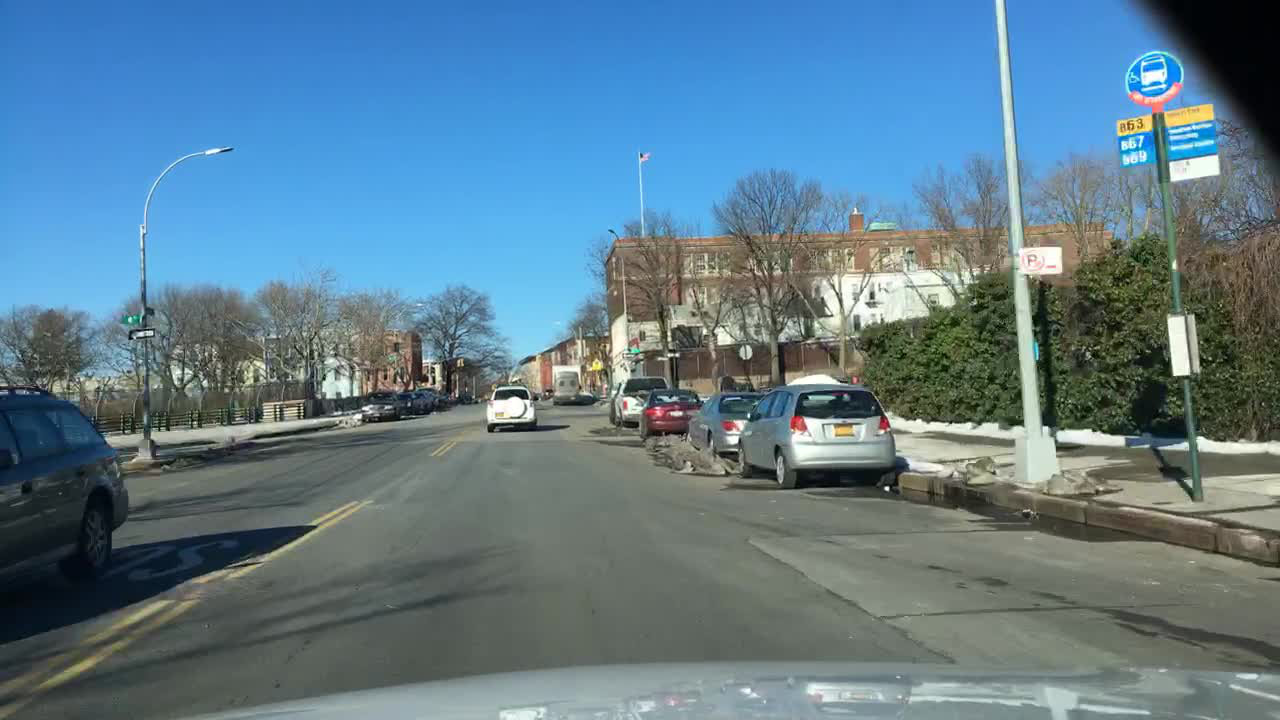

In [7]:
TEST_SINGLE_ID = '47406c52-6f9c5dbf'
Image.open(PATH/TRAIN/f'{TEST_SINGLE_ID}.jpg')
#1280x720 resolution

In [8]:
TRAIN_IDS = [str(TRAIN).split('/')[-1] for TRAIN in list((PATH/TRAIN).iterdir())]

In [9]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

In [37]:
ims = [open_image(PATH/TRAIN/f'{SINGLE_ID}') for SINGLE_ID in TRAIN_IDS[:16]]

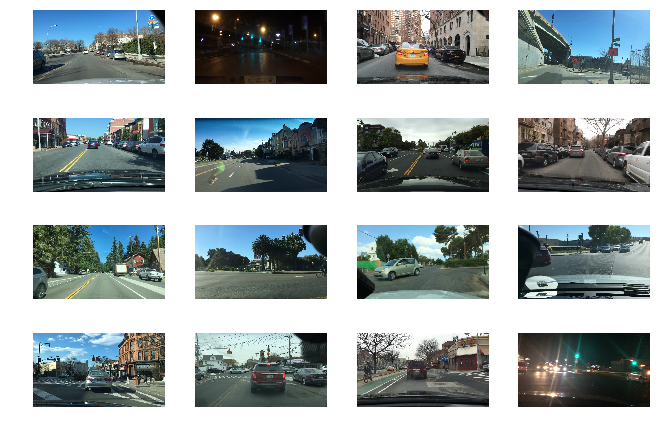

In [38]:
fig, axes = plt.subplots(4, 4, figsize=(9, 6))
for i,ax in enumerate(axes.flat): show_img(ims[i], ax=ax)
plt.tight_layout(pad=0.1)

# Note to self: seems to be a lot of streets from small sample of 16.
# TODO: Figure out how to handle edge cases of night segmentation
# ???: Will reflection on windshield cause errors? Should sky be cropped as well? Reference 21:9 dash cams

In [49]:
from PIL import Image
import os.path

filename = os.path.join(PATH/TRAIN)
# img_to_plot = Image.open(filename)
for SINGLE_ID in TRAIN_IDS[:16]:
    img_to_plot = Image.open(PATH/TRAIN/f'{SINGLE_ID}')
    width, height = img_to_plot.size
    print("SINGLE_ID:", SINGLE_ID, "Dimensions:", img.size)

# img_to_plot = Image.open(PATH/TRAIN/f'{SINGLE_ID}') for SINGLE_ID in TRAIN_IDS[:16]
# width, height = img_to_plot.size
# print("Dimensions:", img.size, "Total pixels:", width * height)

# import matplotlib.pyplot as plt
# plt.plot([1,2,3,4])
# plt.ylabel('some numbers')
# plt.show()


SINGLE_ID: 47406c52-6f9c5dbf.jpg Dimensions: (1280, 720)
SINGLE_ID: b674bc13-3e309d54.jpg Dimensions: (1280, 720)
SINGLE_ID: 444450f8-eb43d2b7.jpg Dimensions: (1280, 720)
SINGLE_ID: 0378d8dc-62d8851d.jpg Dimensions: (1280, 720)
SINGLE_ID: 3f291ac3-d2abcdbd.jpg Dimensions: (1280, 720)
SINGLE_ID: 4fc15031-9165c3f3.jpg Dimensions: (1280, 720)
SINGLE_ID: 0c7aa2a6-9c0f3111.jpg Dimensions: (1280, 720)
SINGLE_ID: bd46953e-1bb2f914.jpg Dimensions: (1280, 720)
SINGLE_ID: 49c6e2f0-00000000.jpg Dimensions: (1280, 720)
SINGLE_ID: 08cc3547-a9930000.jpg Dimensions: (1280, 720)
SINGLE_ID: 9e771b2e-2d041638.jpg Dimensions: (1280, 720)
SINGLE_ID: 96fc479b-ff3929ea.jpg Dimensions: (1280, 720)
SINGLE_ID: 6db48fb9-5aeece40.jpg Dimensions: (1280, 720)
SINGLE_ID: 614fd0a8-9891cb51.jpg Dimensions: (1280, 720)
SINGLE_ID: 4c091ad8-6ea5f0d1.jpg Dimensions: (1280, 720)
SINGLE_ID: 700c3115-5b5b7652.jpg Dimensions: (1280, 720)


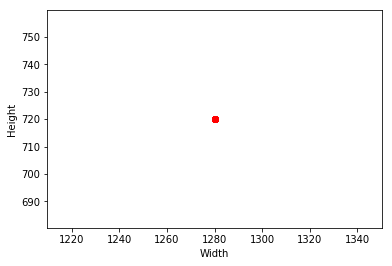

In [63]:
import matplotlib.pyplot as plt

# NOTE: Disabled for speed when restarting kernel. All 10k+ images in TRAIN_IDS are 1280x720
# for SINGLE_ID in TRAIN_IDS:
#     img_to_plot = Image.open(PATH/TRAIN/f'{SINGLE_ID}')
#     width, height = img_to_plot.size
#     plt.plot([width], [height], 'ro')

# plt.xlabel('Width')
# plt.ylabel('Height')
# plt.show()

# Data Prep

In [31]:
class MatchedFilesDataset(FilesDataset):
    def __init__(self, fnames, y, transform, path):
        self.y=y
        assert(len(fnames)==len(y))
        super().__init__(fnames, transform, path)
    def get_y(self, i): return open_image(os.path.join(self.path, self.y[i]))
    def get_c(self): return 0

In [32]:
sz = 256
bs = 8
aug_tfms = [RandomRotate(4, tfm_y=TfmType.CLASS),
            RandomFlip(tfm_y=TfmType.CLASS),
            RandomLighting(0.05, 0.05, tfm_y=TfmType.CLASS)]
trn_x = 

In [ ]:
TRAIN_X = [str(x_name/'images'/x_name.name) + '.png' for x_name in TRAIN_DIRS]
TRAIN_Y = [str(x_name/'multiclass_mask.png') for x_name in TRAIN_DIRS]
TEST_X = [str(x_name/'images'/x_name.name) + '.png' for x_name in TEST_DIRS]
TEST_Y = np.random.choice(TRAIN_Y, len(TEST_X))

In [33]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
denorm = md.trn_ds.denorm

NameError: name 'trn_x' is not defined